In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head()

Step 1

In [0]:
complaint_counts = df.groupby('complaint_type').size().reset_index(name='count').sort_values('count',ascending=False).head(10)
top_10 = complaint_counts['complaint_type']
top_10

146                    Noise - Residential
103                         HEAT/HOT WATER
121                        Illegal Parking
173    Request Large Bulky Item Collection
23                        Blocked Driveway
147                Noise - Street/Sidewalk
193                       Street Condition
211                   UNSANITARY CONDITION
225                           Water System
141                                  Noise
Name: complaint_type, dtype: object

Step 2

In [0]:
filtered_311 = df[df.complaint_type.isin(top_10)]

Step 3

In [0]:
filtered_311.created_date = pd.to_datetime(filtered_311.created_date, format='%m/%d/%Y %I:%M:%S %p')

Step 4

In [0]:
filtered_311['date'] = filtered_311.created_date.dt.date
filtered_311['month'] = filtered_311.created_date.dt.month
filtered_311['weekday_name'] = filtered_311.created_date.dt.weekday_name
filtered_311['weekday'] = filtered_311.created_date.dt.weekday
filtered_311['hour'] = filtered_311.created_date.dt.hour

Step 5

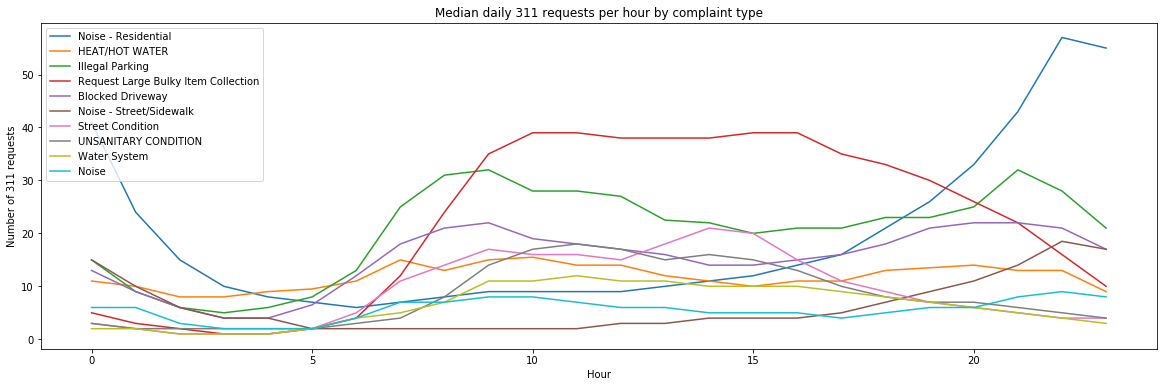

In [0]:
count_hr_date_bycomplaint = filtered_311.groupby(['hour', 'date', 'complaint_type']).size()
median_count_by_hour = count_hr_date_bycomplaint.groupby(['hour', 'complaint_type']).median().reset_index(name='count_median')
plt.figure(figsize=(20, 6))

for i in top_10:
  plt.plot(median_count_by_hour.hour.unique(), median_count_by_hour[median_count_by_hour.complaint_type == i].count_median, label=i)

plt.xlabel("Hour")
plt.ylabel("Number of 311 requests")
plt.title("Median daily 311 requests per hour by complaint type")
plt.legend()


Step 6

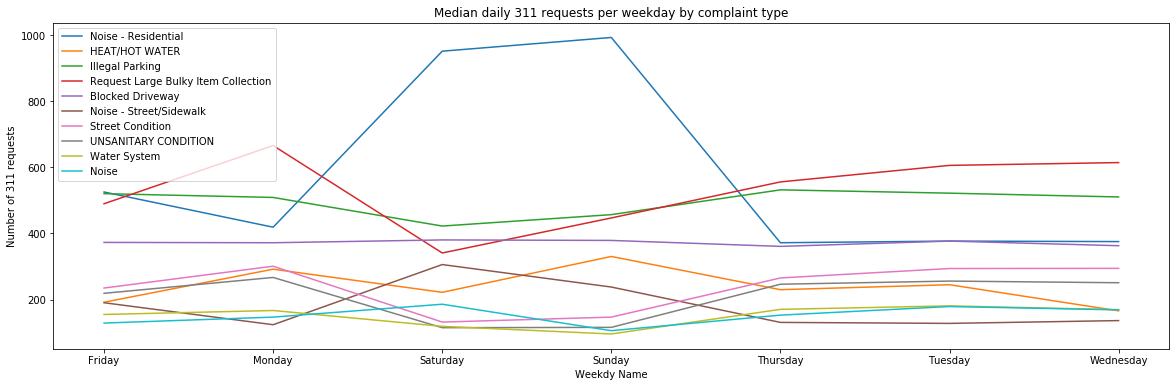

In [0]:
count_byday_bycomplaint = filtered_311.groupby(['weekday_name', 'date', 'complaint_type']).size()
median_count_by_day = count_byday_bycomplaint.groupby(['weekday_name', 'complaint_type']).median().reset_index(name='count_median')
plt.figure(figsize=(20, 6))

for i in top_10:
  plt.plot(median_count_by_day.weekday_name.unique(), median_count_by_day[median_count_by_day.complaint_type == i].count_median, label=i)

plt.xlabel("Weekdy Name")
plt.ylabel("Number of 311 requests")
plt.title("Median daily 311 requests per weekday by complaint type")
plt.legend()

Step 7

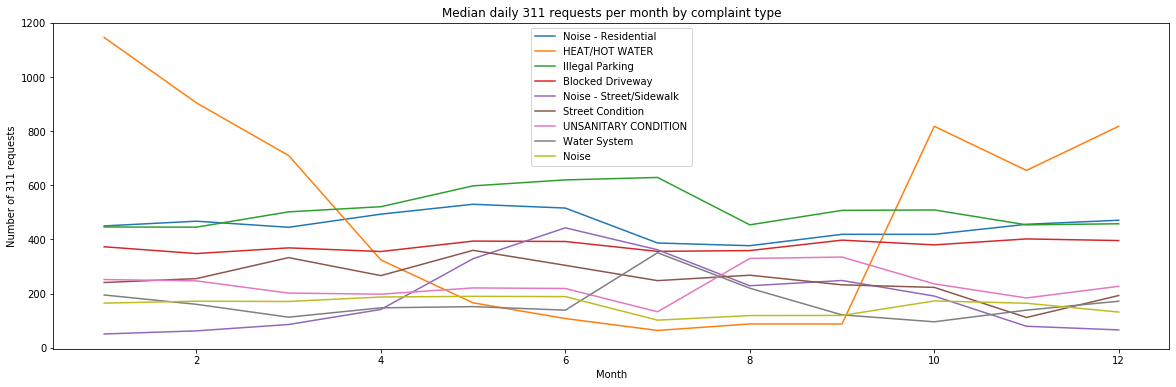

In [0]:
from datetime import date
filtered_311_oneaug = filtered_311[filtered_311['date'] < pd.Timestamp(date(2019,8,1))] #this took me a stupid amount of time to get working
count_bymonth_bycomplaint = filtered_311_oneaug.groupby(['month', 'date', 'complaint_type']).size()
median_count_by_month = count_bymonth_bycomplaint.groupby(['month', 'complaint_type']).median().reset_index(name='count_median')
#takes the median count by date... Why not take the median count by hour or weekday? 
plt.figure(figsize=(20, 6))

top_10_nobulk = top_10.drop(top_10.index[3])
top_10_nobulk

for i in top_10_nobulk:
  plt.plot(median_count_by_month.month.unique(), median_count_by_month[median_count_by_month.complaint_type == i].count_median, label=i)
#Bulky item collection is missing July numbers
plt.xlabel("Month")
plt.ylabel("Number of 311 requests")
plt.title("Median daily 311 requests per month by complaint type")
plt.legend()

In [0]:
median_count_by_month[median_count_by_month.complaint_type == i]

,month,complaint_type,count_median
6,1,Request Large Bulky Item Collection,471.0
16,2,Request Large Bulky Item Collection,467.5
26,3,Request Large Bulky Item Collection,528.0
36,4,Request Large Bulky Item Collection,617.0
46,5,Request Large Bulky Item Collection,641.0
56,6,Request Large Bulky Item Collection,692.0
75,8,Request Large Bulky Item Collection,623.0
85,9,Request Large Bulky Item Collection,540.5
95,10,Request Large Bulky Item Collection,519.0
105,11,Request Large Bulky Item Collection,467.5


Step 8


*   Heat/Hotwater requests peak over the winter
*   Noise related complaints peak over the summer and every weekend, and ever night
*   Buly item collection peaks over weekends (when people have been home to assemble/throw out stuff
